# Exploratory Analysis on Software Professionals Jobs

## Introduction
In this project, we will be working with a datasets containing information of over 20k Software Professionals with different variables like: 

- the `Rating` of the company given by the employee,
- the `Company Name`, 
- the `Job Title` of the employee, 
- the employee `Salary` (in Indian Rupee ₹), 
- the number of `Salaries Reported`, 
- the `Location` of the company, 
- the `Employment Status` and
- the category of the `Job Roles` 

The dataset name is `Software Professionals Salary.csv` and you will find it in the `data` folder of this repository. At [this link](https://www.kaggle.com/datasets/iamsouravbanerjee/software-professional-salaries-2022?search=salary) you can find the source of the data (Kaggle) as well as more information on its composition. 

**Setup:** Import the necessary libraries and load the .csv file to a DataFrame named `sps`. Check that all columns have the correct data type. 

In [13]:
import pandas as pd
import requests
import seaborn as sns

sps = pd.read_csv("data/Software Professionals Salary.csv")
sps.head(10)

,Rating,Company Name,Job Title,Salary,Salaries Reported,Location,Employment Status,Job Roles
0,3.8,Sasken,Android Developer,400000,3,Bangalore,Full Time,Android
1,4.5,Advanced Millennium Technologies,Android Developer,400000,3,Bangalore,Full Time,Android
2,4.0,Unacademy,Android Developer,1000000,3,Bangalore,Full Time,Android
3,3.8,SnapBizz Cloudtech,Android Developer,300000,3,Bangalore,Full Time,Android
4,4.4,Appoids Tech Solutions,Android Developer,600000,3,Bangalore,Full Time,Android
5,4.2,Freelancer,Android Developer,100000,3,Bangalore,Full Time,Android
6,3.7,SQUARE N CUBE,Android Developer,192000,3,Bangalore,Full Time,Android
7,3.1,Samsung R&D Institute India - Bangalore,Android Developer,400000,3,Bangalore,Full Time,Android
8,3.7,DXMinds Technologies,Android Developer,300000,3,Bangalore,Full Time,Android
9,3.6,Endeavour Software Technologies,Android Developer,600000,3,Bangalore,Full Time,Android


What is the shape (rows, cols) of the `sps` DataFrame? 

In [14]:
sps.shape

(22770, 8)

How many unique `Job Roles` are there in the dataset? 

In [15]:
len(sps["Job Roles"].unique())

11

How many unique `Job Title` are there for the "Python" `Job Role`? 

In [16]:
len(sps.loc[sps["Job Roles"] == "Python"]["Job Title"].drop_duplicates())

102

Of the `Company Name`s that are listed in the DataFrame, **how many** have a "Python" `Job Role` with a `Job Title` containing the **substring** "Analyst"?

In [17]:
len(sps[sps["Job Title"].str.contains("Analyst")].loc[sps["Job Roles"] == "Python"])

3

Which `Company Name` has the highest number of `Salaries Reported` (across all `Job Title`s)?

In [18]:
sps.groupby('Company Name', as_index=False)['Salaries Reported'].sum().sort_values('Salaries Reported', ascending=False).head(1)


,Company Name,Salaries Reported
660,Amazon,2636


Given the `Company Name` you found at the previous question, how many `Location`s is this company present in? 

In [19]:
len(sps.loc[sps["Company Name"] == "Infosys"]["Location"].unique())


9

As you may have noticed, the `Salary` is reported in Indian Rupees (ISO code: INR). Using the [Open Access Endpoint](https://www.exchangerate-api.com/docs/free) (no API Key required) of the ExchangeRate-API service, create a new column named `Salary USD` containing the salary-equivalent in USD and round the result to zero decimals. What is the conversion rate between USD-INR at the time of your execution? *Note: of course, this result will change in time*

In [20]:
usd_req = requests.get("https://open.er-api.com/v6/latest/USD")
inr_conv_rate = usd_req.json()['rates']['INR']
sps["Salary USD"] = round(sps["Salary"] / inr_conv_rate)

#USD-INR Conversion Rate
inr_conv_rate

81.531444

What is the average `Salary USD` for the "Python" `Job Role`? 

In [21]:
sps.loc[sps["Job Roles"] == "Python"]["Salary USD"].mean()

5961.239704329461

Which `Company Name` has the highest **average** `Salary EUR` across all `Job Title`s? 

In [22]:
eur_req = requests.get("https://open.er-api.com/v6/latest/EUR")
eur_conv_rate = eur_req.json()['rates']['INR']


sps["Salary EUR"] = round(sps["Salary"] / eur_conv_rate)
sps.groupby("Company Name")['Salary EUR'].mean().idxmax()

'Thapar University'

Create a Plot that shows the **relationship** between the average `Salary EUR` and the average `Rating` for each `Company Name`. Do you see any anomaly in the plot? Which is the `Company Name` that is causing this oddity?

'Thapar University'

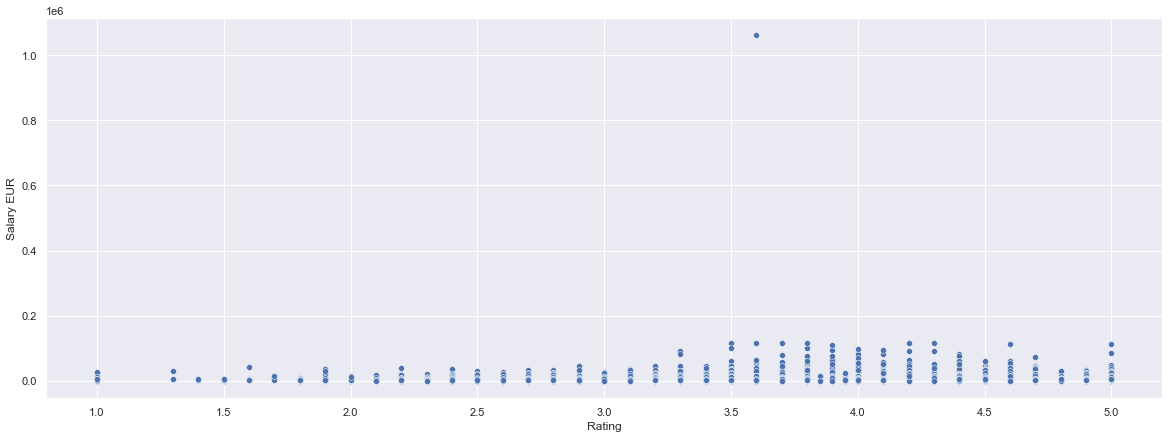

In [23]:
sns.set(rc={'figure.figsize':(20, 7)})
sns.scatterplot(x='Rating', y='Salary EUR', data=sps)

# Extract the index and "Company Name" value of the highest salary
sps.iloc[sps["Salary EUR"].idxmax()]["Company Name"]